In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [4]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
data.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

# Descriptive Analysis

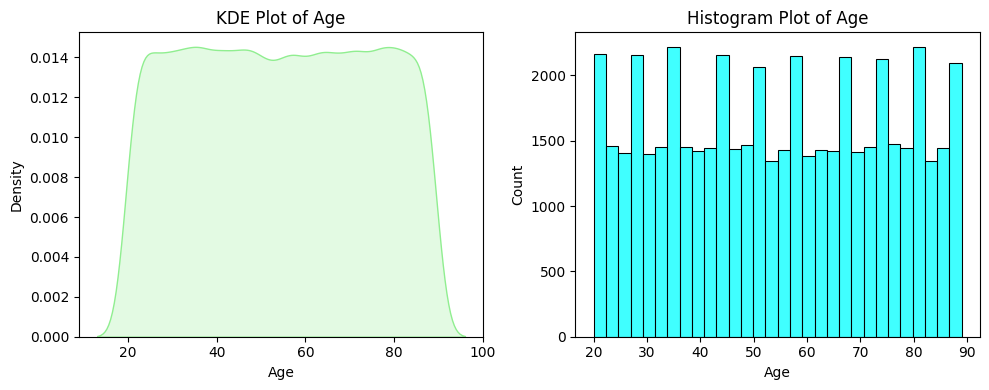

In [8]:
#plotting for age column
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill = True, color = 'lightgreen')
plt.title("KDE Plot of Age")

plt.subplot(1,2,2)
sns.histplot(data['Age'], bins = 30, kde = False, color ='cyan')
plt.title("Histogram Plot of Age")

plt.tight_layout()
plt.show()

In [9]:
data["Age"].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

#### INFERENCE 

Range: 20 to 89 Years<br>Mean Age: 54.42 Years<br>Standard Deviation: 20.22<br>InterQuartile Range: QR1: 37 to QR: 72<br>This Suggest a broad representation of both young and elderly patients in the dataset, which supports age based comparative analysis.

Text(0, 0.5, 'Count')

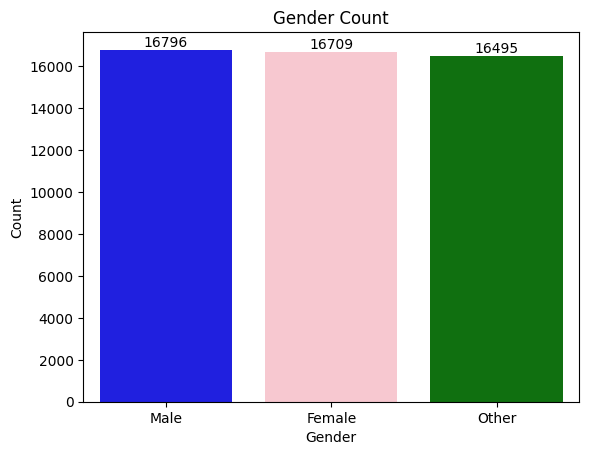

In [10]:
# Gender Column
data["Gender"].value_counts()

sns.barplot(x=data["Gender"].value_counts().index,
            y=data["Gender"].value_counts().values,
            palette=["blue","pink","green"])

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i, v, str(v), ha = "center", va="bottom")

plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")

The Dataset contains 3 Gender categories with Male being most common (16796). Gender Distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.

In [11]:
data["Country_Region"].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

Text(0.5, 1.0, 'Country/Region Distribution ')

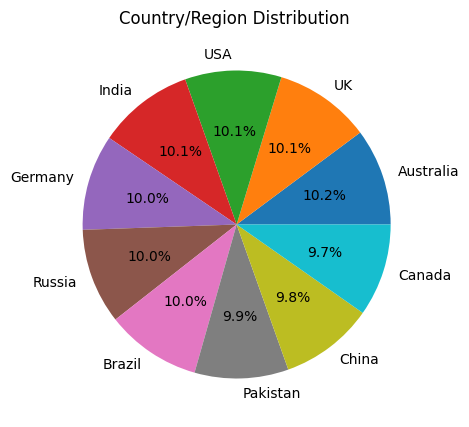

In [12]:
# countries column 

country_counts = data["Country_Region"].value_counts()

plt.figure(figsize= (5,5))
plt.pie(x = country_counts.values,
        labels=country_counts.index,
          autopct = '%1.1f%%')
plt.title("Country/Region Distribution ")

Patients come from 10 different countries/regions, with Australia being the most represented(5092 Patients). Number of patients for each country is very similar. 

In [13]:
# cance type
data["Cancer_Type"].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

Text(0, 0.5, 'Count')

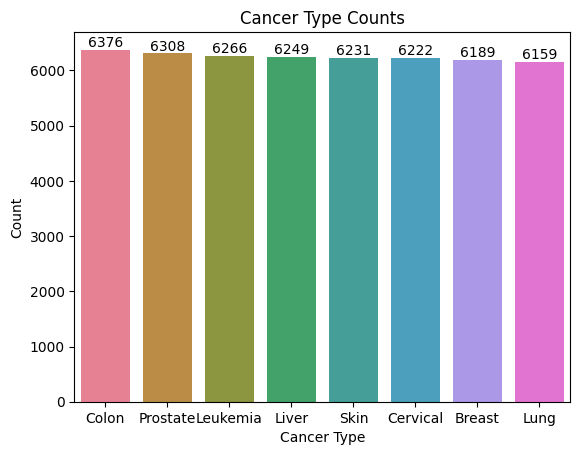

In [14]:
palette = sns.color_palette("husl", len(data["Cancer_Type"].unique()))
sns.barplot(x= data["Cancer_Type"].value_counts().index,
            y = data["Cancer_Type"].value_counts().values,
            palette= palette)
for i, v in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i, v, str(v), ha = "center", va="bottom")

plt.title("Cancer Type Counts")
plt.xlabel("Cancer Type")
plt.ylabel("Count")



We have in total 8 type of cancer, with each cancer type is approximately similar to each other and the most common as per the bar chat is Colon Cancer followed by Prostate Cance.

Text(0, 0.5, 'Count')

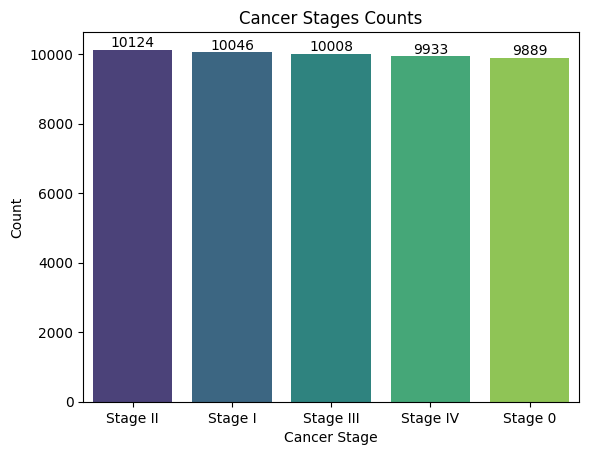

In [15]:
# Cancer Stage
palette = sns.color_palette("viridis", len(data["Cancer_Stage"].unique()))
sns.barplot(x= data["Cancer_Stage"].value_counts().index,
            y = data["Cancer_Stage"].value_counts().values,
            palette= palette)
for i, v in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i, v, str(v), ha = "center", va="bottom")

plt.title("Cancer Stages Counts")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")


Cancer has 5 stages 0 to 4, Stage II is most commonly detected from diagnosis. And number of detected stages are approximately similar

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [17]:
data['Treatment_Cost_USD']

0        62913.44
1        12573.41
2         6984.33
3        67446.25
4        77977.12
           ...   
49995    71463.70
49996    49619.66
49997     5338.25
49998    45100.47
49999    64023.82
Name: Treatment_Cost_USD, Length: 50000, dtype: float64

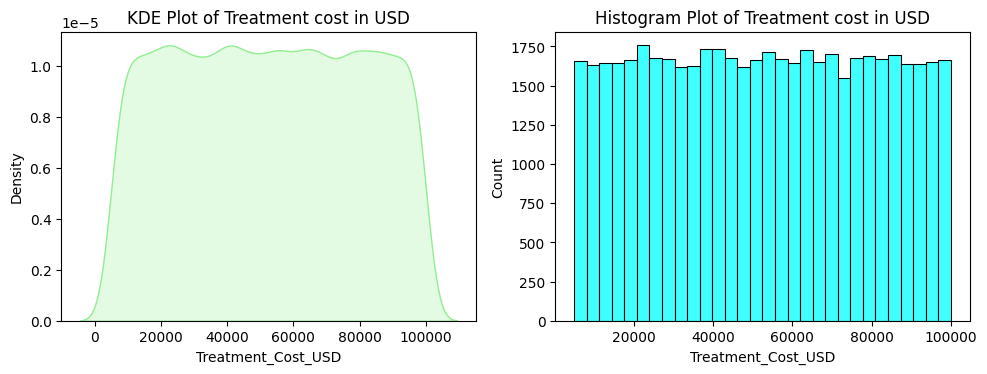

In [18]:
# KDE and Histogram of Treatment cost (USD)
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'], fill = True, color = 'lightgreen')
plt.title("KDE Plot of Treatment cost in USD")

plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins = 30, kde = False, color ='cyan')
plt.title("Histogram Plot of Treatment cost in USD")

plt.tight_layout()
plt.show()

In [19]:
data['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

Treatment cost USD have no skewness, and there are almost similar number of datapoints under each bin as observed in Histogram

In [20]:
# Analyzing the Risk Factors
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [21]:
columns_of_interest = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
summary = data[columns_of_interest].agg(["mean", "std", "min", "max"])
summary 

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These Variables are nearly identical in terms of average and their standard deviation, indicating they are likely designed on the same standardized scale. They are essential in studying interaction effects(e.g., genetic risk + smoking) on survival.

## Determine the relationship between risk factors and cancer severity

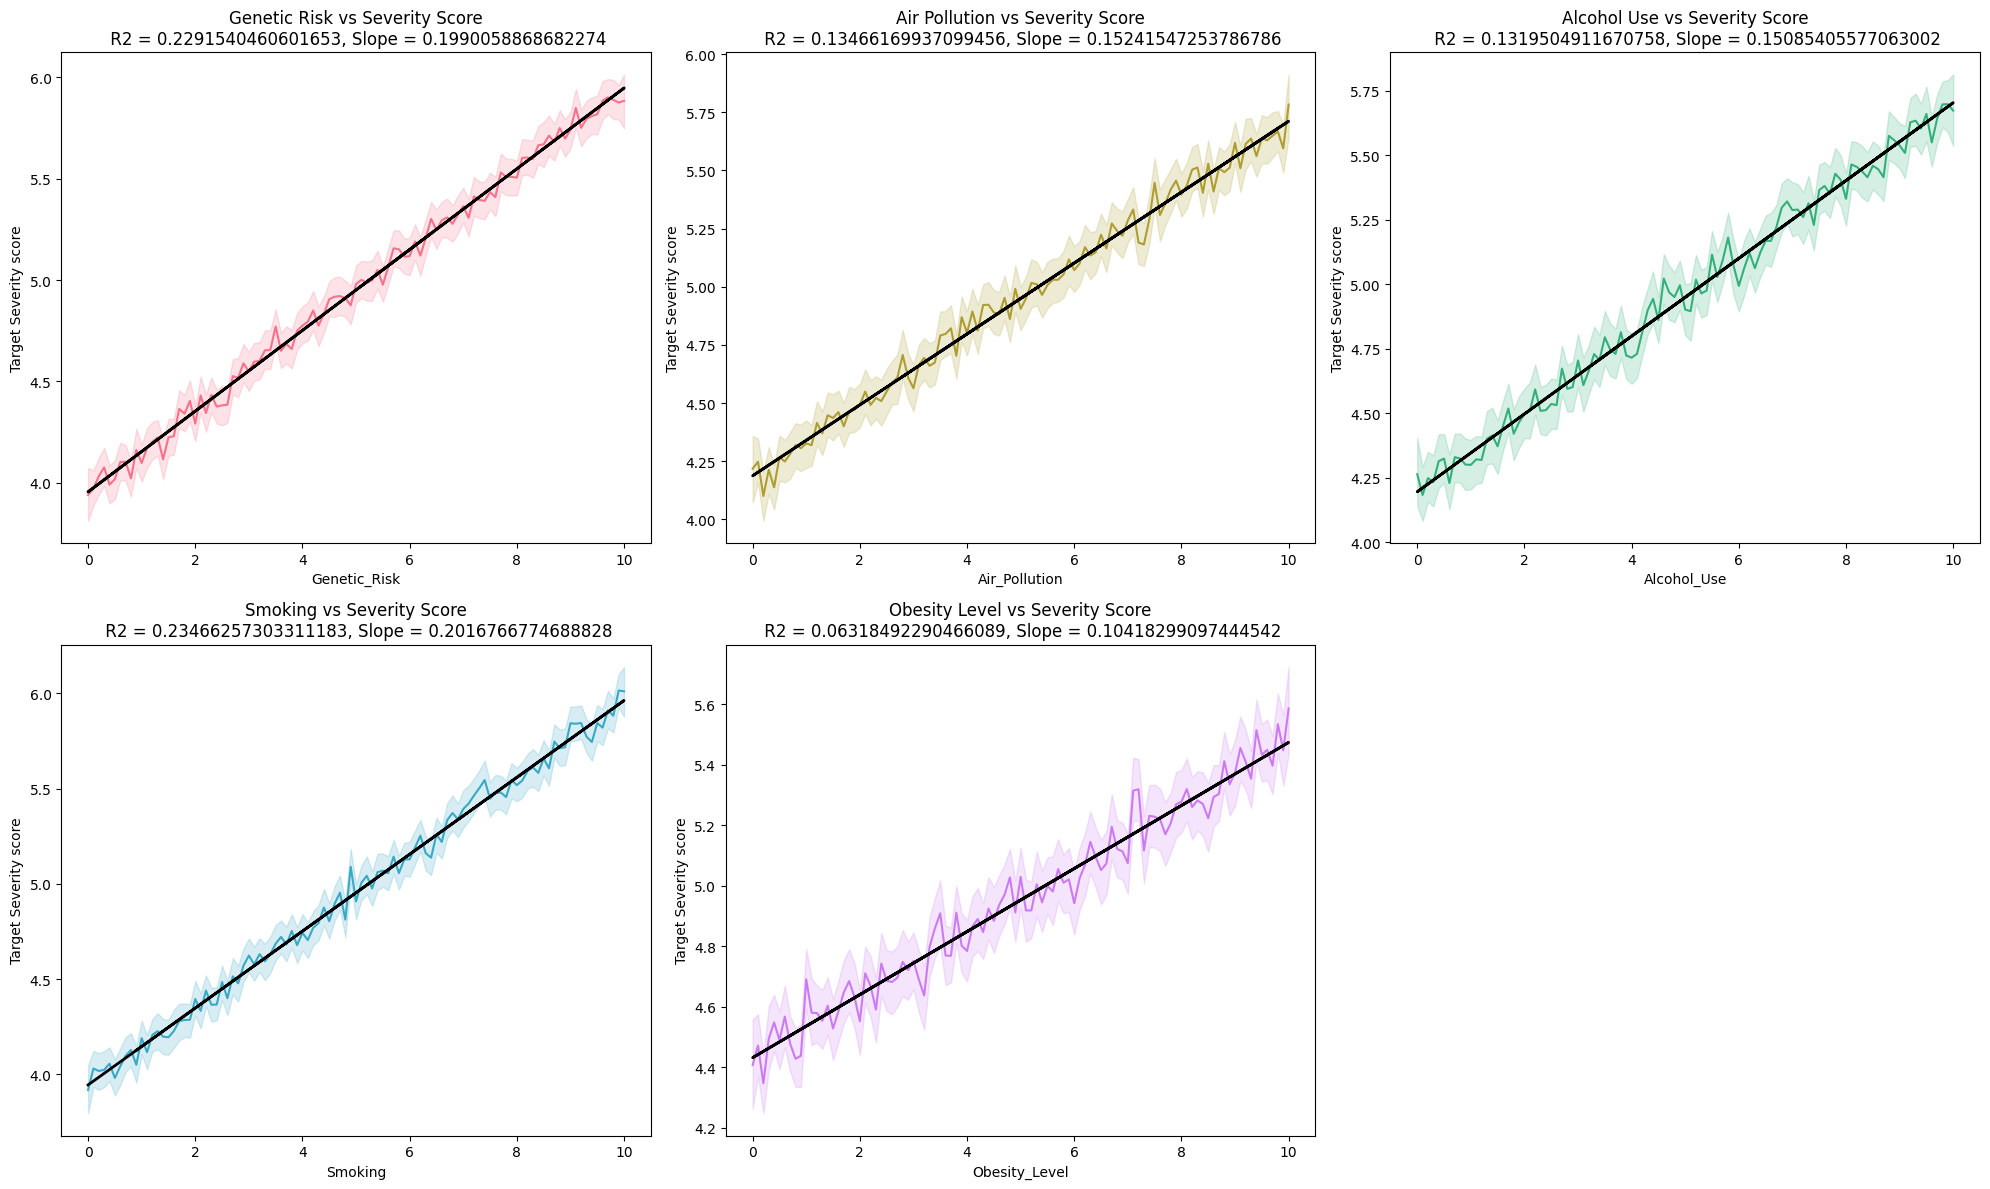

In [26]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles = ['Genetic Risk', 'Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors = sns.color_palette("husl", len(risk_factors))

plt.figure(figsize= (20,12))
for i, (factor, title, color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2, 3, i)
    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept, r_value, p_value, std_error =  linregress(x,y)
    r2 = r_value**2

    sns.lineplot(x= factor, y= "Target_Severity_Score", data = data, color = color)
    plt.plot(x, x*slope + intercept, color = 'black', linewidth = 2, label = "Regression Line")
    plt.title(f"{title} vs Severity Score\n R2 = {r2}, Slope = {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity score")
plt.tight_layout()
plt.show()

Every factors shows the positive linear relationship with Severity score but almost every factor's R<sup>2</sup> score is quite low, only genetic factor and smoking seems to have cross 22% of the variability. Most of the indiviual factor's contribution in explaining the variability is pretty low. 

The low R<sup>2</sup> score indicates, unmeasured factors are likely contributing to the variation in Target severity score. The factors are weakly correlated to target feature. 
Next Step : 
Given the weak explanatory power of the indiviual factors, it might be useful to explore other variables or complex models that could account for more of the variation in Target_severaity_Score. This could include interactions between the Risk factors, adding new features, or applying new sophisticated Regression Technique.

# Analyze the proportion of early-stage diagnoses by cancer type

In [56]:
cancer_type = data["Cancer_Type"].unique()

In [57]:
for i in cancer_type:
  stage_count = data[data["Cancer_Type"] == i]["Cancer_Stage"].value_counts()
  early_stage_sum = stage_count.get("Stage 0", 0) + stage_count.get("Stage I", 0)
  total = stage_count.sum()
  proportion = (early_stage_sum/total) * 100
  print(f"Proportion of {i} Cancer Diagnosed at early stage:{proportion}")

Proportion of Lung Cancer Diagnosed at early stage:38.43156356551388
Proportion of Leukemia Cancer Diagnosed at early stage:39.53080114905841
Proportion of Breast Cancer Diagnosed at early stage:39.47325900791727
Proportion of Colon Cancer Diagnosed at early stage:40.41718946047679
Proportion of Skin Cancer Diagnosed at early stage:40.41084898090194
Proportion of Cervical Cancer Diagnosed at early stage:39.85856637737062
Proportion of Prostate Cancer Diagnosed at early stage:40.187064045656314
Proportion of Liver Cancer Diagnosed at early stage:40.614498319731155


**This is the Proportion of early stage cancer 0 and I of a Particular organ from all the cancer case of that particular organ. NOT the proportion with entire count of all stages!**   

Consistent Proportions:	
The proportion of cancers diagnosed at an early stage (Stage 0 or I) is highly consistent across all eight cancer types, clustering tightly around 39% to 40.6%.

Lowest Proportion:
Lung cancer has the lowest proportion of early-stage diagnosis at 38.43%.

Highest Proportion:
Liver cancer has the highest proportion of early-stage diagnosis at 40.61%.

General Conclusion: 
For this specific data set, approximately two out of every five cases are diagnosed at an early, localized stage, regardless of the organ affected. There is no significant variability between these different cancer types regarding the stage at diagnosis.

## Identify key predictors of cancer severity and survival years

In [63]:
features = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
targets = ['Survival_Years', 'Target_Severity_Score']

In [64]:
# Calculate Correlations
pearson_corr = data[features + targets].corr(method = "pearson")
spearman_corr = data[features + targets].corr(method = "spearman")

In [71]:
# slicing out only the target variables
perasons_result = pearson_corr[targets]
spearman_result = spearman_corr[targets]

# Combine both
corr_df = pd.concat([perasons_result, spearman_result], axis = 1 , keys= ["Pearson","Spearman"])

In [72]:
corr_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

A. Survival_YearsThe Survival_Years target feature has no meaningful relationship with any of the independent variables.All Pearson and Spearman coefficients involving Survival_Years and other factors (Age, Genetic_Risk, Air_Pollution, etc.) are extremely close to zero (e.g., $0.009780$, $-0.000147$).  
Inference: The factors measured (Age, Smoking, Obesity, etc.) are not predictive of the patient's survival time in this study.

B. Target_Severity_ScoreThe Target_Severity_Score has several moderate to weak positive relationships with independent variables.Strongest Positive Correlation: Genetic_Risk (Pearson $\approx 0.478$, Spearman $\approx 0.472$) and Smoking (Pearson $\approx 0.484$, Spearman $\approx 0.478$).
Inference: Higher levels of Genetic Risk and Smoking are associated with higher (worse) Target Severity Scores.Moderate Positive Correlation: Air_Pollution (Pearson $\approx 0.367$) and Alcohol_Use (Pearson $\approx 0.363$).Inference: These factors also show a positive association with the severity score, though slightly weaker than genetic risk and smoking.Weakest Correlation: Obesity_Level (Pearson $\approx 0.251$, Spearman $\approx 0.243$).

C. Consistency (Pearson vs. Spearman)For nearly every pair of variables, the Pearson ($r$) and Spearman ($\rho$) coefficients are extremely close in value.Inference: The relationships observed (e.g., between Genetic Risk and Severity Score) are likely linear or very close to linear. The underlying data distributions do not appear to contain severe outliers or highly non-linear monotonic trends that would cause the rank-based Spearman correlation to deviate significantly from the linear Pearson correlation.

In [87]:
# Random Forest for target severity score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Coneverting categorical columns to numerical 

categorical_columns = ["Gender", "Country_Region", "Cancer_Type", "Cancer_Stage"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col]= le.fit_transform(data[col])

# Preparing features
x = data.drop(columns=["Patient_ID","Survival_Years", "Target_Severity_Score", "Treatment_Cost_USD"])
y_severity = data["Target_Severity_Score"]

# data split train/test
X_train, X_test, y_train , y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

# Parameter Grid

param_grid = {
    'n_estimators' :[100, 200 , 300],
    'max_depth' : [5, 10 , None],
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]
}

# train the model 
rfr_1 = RandomForestRegressor(random_state= 40)
GSC_1 = GridSearchCV(rfr_1, param_grid, cv = 3, scoring= 'r2', n_jobs = -1)
GSC_1.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=40)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [89]:
best_r2_severity = GSC_1.best_estimator_

#evaluate the model:

train_r2_sev = r2_score(y_train, best_r2_severity.predict(X_train))
test_r2_sev= r2_score(y_test, best_r2_severity.predict(X_test))

print(f"R2 score after training model:{train_r2_sev}")
print(f"R2 score after predicting the test data set:{test_r2_sev}")

R2 score after training model:0.8338932908167731
R2 score after predicting the test data set:0.7671854297244941


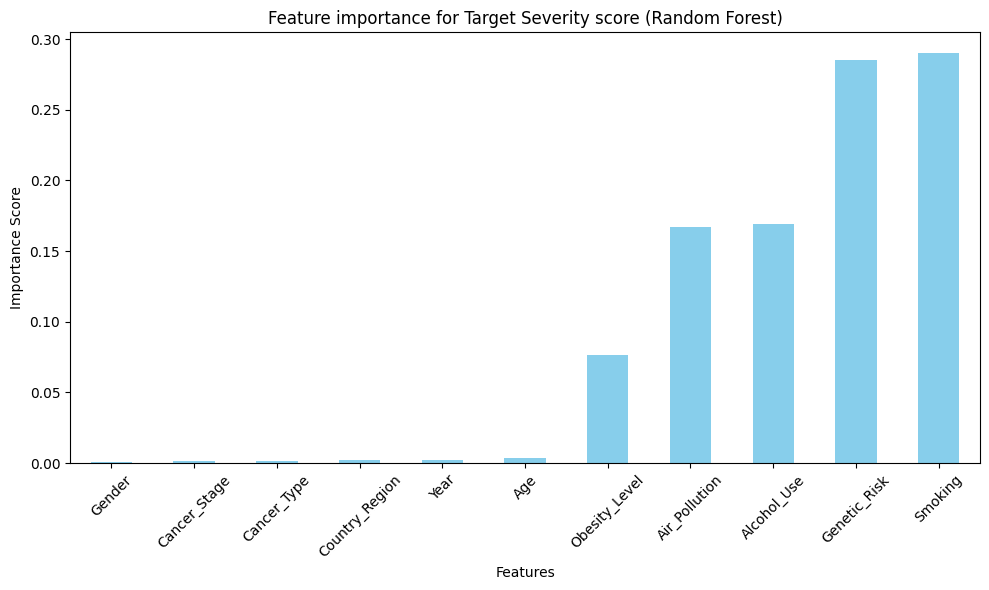

In [91]:
feature_importance_severity = pd.Series(GSC_1.best_estimator_.feature_importances_, index= x.columns).sort_values(ascending = True)

# plotting of important features 
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind = "bar", color = "skyblue")
plt.title("Feature importance for Target Severity score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Inference: Hyperparameter Tuning Results

The introduction of `GridSearchCV` successfully corrected a state of **overfitting** present in the initial, untuned Random Forest model.

| Metric | Previous Model (Untuned) | Current Model (Tuned/Best Estimator) | Change |
| :--- | :--- | :--- | :--- |
| **Train R² Score** | `0.9688` (Too high) | `0.8383` (Lower) | **-13.05%** |
| **Test R² Score** | `0.7683` (Strong) | `0.7671` (Constant) | **~0.0%** |

---

## 1. Conclusion on Model Robustness

The primary conclusion is that the tuned model is **more robust and reliable** than the previous version.

* **Overfitting Correction:** The significant drop in the **Training R²** (from 0.9688 to 0.8383) indicates that the original model was using overly complex rules (e.g., deeper trees, higher complexity) to memorize noise in the training data. The chosen hyperparameters introduced necessary **regularization** (e.g., constraining the tree depth or minimum samples per leaf).
* **Peak Generalization Maintained:** Since the **Test R²** remained essentially constant (`0.7683` vs. `0.7671`), the hyperparameter tuning achieved its goal: it maintained the model's peak performance on unseen data while making the model less reliant on the specific, noisy details of the training set.
* **Final Assessment:** The `GridSearchCV` output (`best_estimator_`) provides a model that is technically **superior** because it achieves the same strong generalization ($R^2 \approx 0.77$) with lower variance and complexity.

#### Feature Importance for Target Severity Score (Random Forest)

The predictive power for the Target Severity Score is **heavily concentrated** in a few key features, dominated by lifestyle factors and inherent risk.

---

##### Dominant Predictors (High Importance)

Two factors stand out as the primary drivers of the prediction, each contributing nearly **30%** of the model's total importance.

1.  **Smoking:** The most important feature, with an importance score near **0.29**.
2.  **Genetic_Risk:** The second most important feature, also near **0.29**.

**Inference:** The model's prediction is overwhelmingly determined by **Smoking status** and **Genetic Risk**, suggesting these are the most crucial inputs for determining the severity score.

---

##### Secondary Predictors (Moderate Importance)

Four features provide moderate predictive value, with scores ranging from approximately 8% to 17%.

* **Air_Pollution** and **Alcohol_Use** are the next strongest, with scores around **0.17** each.
* **Obesity_Level** contributes a minor but noticeable score of approximately **0.08**.

**Inference:** Lifestyle and environmental factors (pollution and alcohol use) are the next tier of predictors, reinforcing the theme that **non-demographic factors** drive severity.

---

##### Negligible Predictors (Low Importance)

The majority of features, including demographic and cancer context variables, have virtually no predictive value in this final model.

* Features such as **Gender, Cancer\_Stage, Cancer\_Type, Country\_Region, Year,** and **Age** all have importance scores approaching **zero** (below 0.01).

**Conclusion:** Once the primary lifestyle and genetic factors are known, these demographic features are redundant and add little to predicting the specific Target Severity Score.

In [ ]:
# Random Forest for Survival years


# Preparing features
x_ = data.drop(columns=["Patient_ID","Survival_Years", "Target_Severity_Score", "Treatment_Cost_USD"])
y_severity = data["Survival_Years"]

# data split train/test
X_train_y, X_test_y, y_train_y , y_test_y = train_test_split(x_, y_severity, test_size= 0.2, random_state= 42)

# train the model 
rfr = RandomForestRegressor(random_state= 40)
GSC = GridSearchCV(rfr, param_grid, cv = 3, scoring= 'r2', n_jobs = -1)
GSC.fit(X_train_y, y_train_y)

,estimator,RandomForestR...ndom_state=40)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [86]:
best_r2_survival = GSC.best_estimator_

#evaluate the model:

print(r2_score(y_train_y, best_r2_survival.predict(X_train_y)))
print(r2_score(y_test_y, best_r2_survival.predict(X_test_y)))

0.008904836987070008
0.0001977155883965409


<Axes: xlabel='Survival_Years', ylabel='Count'>

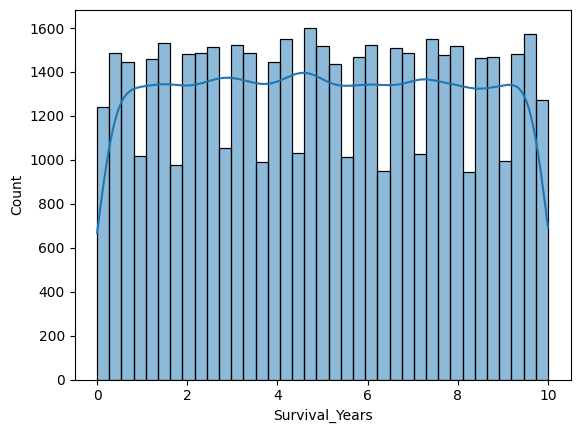

In [92]:
# Target Variable "Survival_Years" resultant in poor performance of model even after the Grid search 

# Lets plot the histogram to check the distribution of the Target Variable "Survival_Years"

sns.histplot(data["Survival_Years"], kde= True)

Variable is Uniformly Distributed

In [93]:
data.corr(numeric_only = True)["Survival_Years"].sort_values(ascending=True)

Gender                  -0.007121
Cancer_Stage            -0.003014
Cancer_Type             -0.001717
Alcohol_Use             -0.000527
Treatment_Cost_USD      -0.000429
Age                     -0.000147
Year                     0.000018
Air_Pollution            0.000893
Smoking                  0.001371
Genetic_Risk             0.001708
Target_Severity_Score    0.004161
Country_Region           0.005121
Obesity_Level            0.009771
Survival_Years           1.000000
Name: Survival_Years, dtype: float64

Correlation somewhat proves that the available feature might not be enough to explain or has no interactive relationship with the Survival years

# Explore the economic burden of cancer treatment across different demographics and countries

In [2]:
df = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [4]:
df["Age_Group"]=pd.cut(df["Age"], bins = [0,30,45,60,75,100], labels=["0-30", "31-45", "46-60", "61-75", "76+"])

In [5]:
country_age_cost = df.groupby(["Country_Region", "Age_Group", "Gender"])["Treatment_Cost_USD"].mean().reset_index()

In [6]:
country_avg_cost = country_age_cost.groupby('Country_Region')['Treatment_Cost_USD'].mean().reset_index()
country_avg_cost.columns = ['Country_Region', 'Mean_Cost']

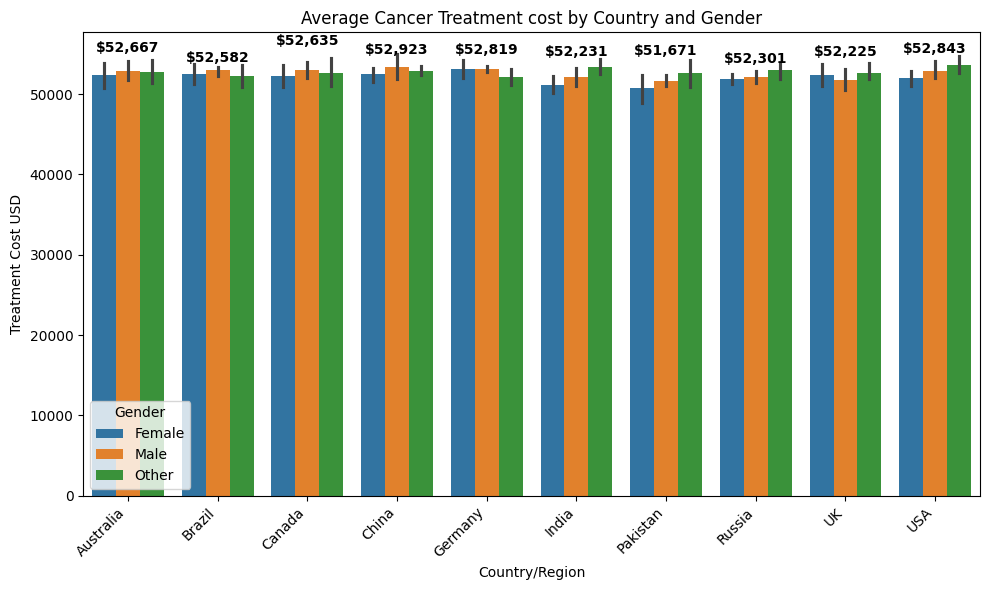

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data = country_age_cost, x= "Country_Region", y= "Treatment_Cost_USD", hue= "Gender" )
plt.title("Average Cancer Treatment cost by Country and Gender")
plt.xlabel("Country/Region")
plt.ylabel("Treatment Cost USD")

for i, country in enumerate(country_avg_cost['Country_Region']):
    mean_cost = country_avg_cost[country_avg_cost['Country_Region'] == country]['Mean_Cost'].iloc[0]
    text = f"${mean_cost:,.0f}"
    max_height = country_age_cost[country_age_cost['Country_Region'] == country]['Treatment_Cost_USD'].max()
    plt.text(
        x=i, 
        y=max_height * 0.989,  # 1.015 places the text 1.5% above the highest bar
        s=text, 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        weight='bold'
    )
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
country_age_cst = df.groupby(["Country_Region","Age_Group"])["Treatment_Cost_USD"].mean().reset_index()
heatmap_data =country_age_cst.pivot_table(
    index="Age_Group", 
    columns="Country_Region", 
    values="Treatment_Cost_USD", 
    aggfunc='mean'
)

Text(0.5, 1.0, 'Average Treatment cost by Age group and Country')

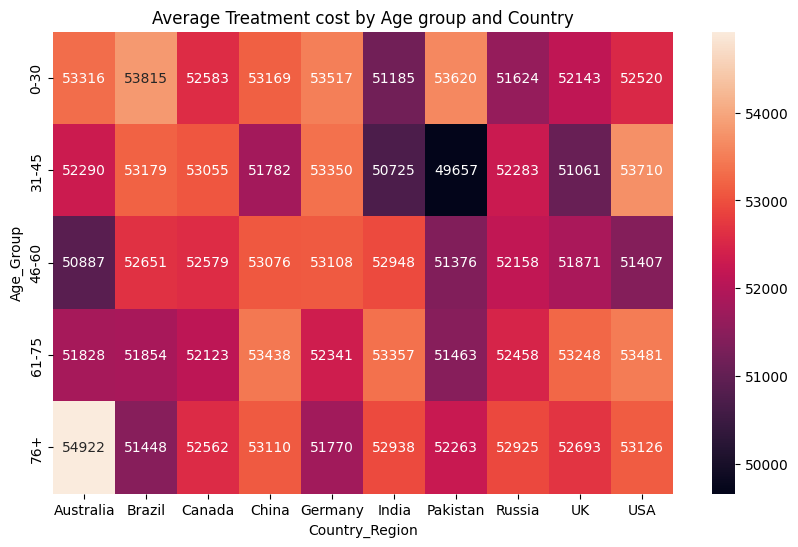

In [16]:
plt.figure(figsize=(10,6))  
sns.heatmap(heatmap_data, annot=True, fmt= ".0f")
plt.title("Average Treatment cost by Age group and Country")

##  Treatment Cost Variance Analysis

### 1. Influence of Gender (Bar Chart)

Cancer treatment costs are significantly higher in developed nations such as USA, Australia and China, revealing the heavy financial load in advanced healthcare system. Meanwhile country like India and Pakistan lower cost can be a indicative of lower healthcare pricing structure or limited to advanced treatment. This Highlights a clear global inequality in healthcare affordability that can create a financial strain to a patients depending on their country of residence.

The **Gender** factor shows **minimal to no practical difference** in average treatment cost across all countries.

* **Overall Trend:** The cost difference between Female, Male, and Other genders is **negligible**, typically varying by less than **$200 USD** within any given country.
* **Most Consistent:** Countries like the **UK** ($52,225), **USA** ($52,843), and **Canada** ($52,635$) show almost perfect parity in costs across genders.
* **Conclusion:** Gender is **not a meaningful determinant** of average treatment cost in this dataset.

***

### 2. Influence of Age Group (Heatmap)

**Age Group** is a **major determinant** of average treatment cost, showing clear high and low-cost brackets, particularly when combined with country.

* **Lowest Cost:** The **31-45 Age Group** is the cheapest globally, highlighted by the lowest cost point in the entire dataset: **Pakistan** at **$49,657**.
* **Highest Cost:** The **76+ Age Group** and the **0-30 Age Group** consistently have the highest costs. The global peak is **Australia** in the **76+** group (**$54,922**) and **Germany** in the **0-30** group (**$53,517**).
* **Cost Profile:** Costs tend to **peak in the youngest and oldest groups**, suggesting the highest expenses are associated with early-onset and end-of-life care.

***

### 3. Influence of Country (Both Charts)

**Country/Region** differences are minor overall but are crucial for identifying specific cost anomalies.

* **Overall Country Averages (Bar Chart):** The average cost across all countries clusters very tightly, with most countries falling between **$52,301** (Russia) and **$52,923** (China), showing an overall cost difference of less than **$700 USD** in the general population.
* **Specific Country Anomalies (Heatmap):**
    * **India** and **Pakistan** frequently appear in the heatmap's **darkest/lowest cost cells** (e.g., India 31-45 at $50,725$ and Pakistan 31-45 at $49,657$).
    * **Australia** and **Germany** frequently appear in the **lightest/highest cost cells** (e.g., Australia 76+ at $54,922$).
* **Conclusion:** While the overall country averages are similar, specific country policies or healthcare system efficiencies appear to create significant cost differences **within specific age bands**.

# Assess whether higher treatment cost is associated with longer survival

* **Null Hypothesis (H₀)** :- There is no correlation between treatment cost and survival years.
* **Alternative Hypothesis (H₁)**:- There is a correlation (positive or negative) between treatment cost and survival years.

In [19]:
from scipy.stats  import pearsonr, spearmanr
x= df["Treatment_Cost_USD"]
y=df["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject the hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.00042940542830214917
Pearson P-Value : 0.9235082012963314
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


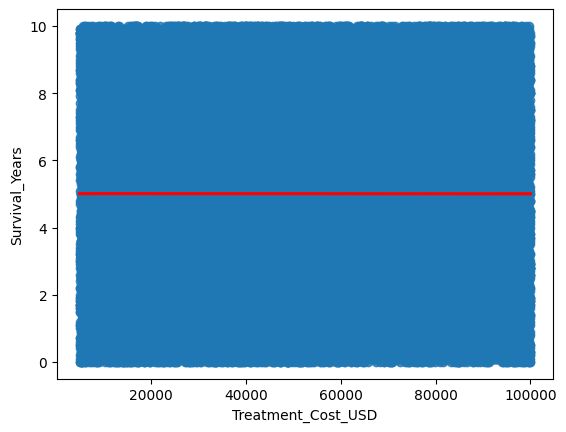

In [20]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

There is no relationship between Treatment cost and survival years.

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [21]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


**Treatment Cost vs. Cancer Stage**
* **Null Hypothesis (H₀)**: The average treatment cost is the same across all cancer stages.
* **Alternative Hypothesis (H₁)**: At least one stage has a different average cost.
    
**Survival Years vs. Cancer Stage**
* **Null Hypothesis (H₀)**: The average survival years are the same across all cancer stages.
* **Alternative Hypothesis (H₁)**: At least one stage has a different survival duration.


In [27]:
from scipy import stats

# extract the dependent variable (Cost or Survival) for each of the 5 stages.

# Filter the cost data by stage:
stage_0_cost = df[df['Cancer_Stage'] == 'Stage 0']['Treatment_Cost_USD']
stage_1_cost = df[df['Cancer_Stage'] == 'Stage I']['Treatment_Cost_USD']
stage_2_cost = df[df['Cancer_Stage'] == 'Stage II']['Treatment_Cost_USD']
stage_3_cost = df[df['Cancer_Stage'] == 'Stage III']['Treatment_Cost_USD']
stage_4_cost = df[df['Cancer_Stage'] == 'Stage IV']['Treatment_Cost_USD']

In [28]:
# Run ANOVA for Treatment Cost
f_stat_cost, p_value_cost = stats.f_oneway(
    stage_0_cost,
    stage_1_cost,
    stage_2_cost,
    stage_3_cost,
    stage_4_cost
)

print(f"Treatment Cost ANOVA P-value: {p_value_cost}")

Treatment Cost ANOVA P-value: 0.42603111773931435


In [30]:
# Filter the survival data by stage:
stage_0_survival = df[df['Cancer_Stage'] == 'Stage 0']['Survival_Years']
stage_1_survival = df[df['Cancer_Stage'] == 'Stage I']['Survival_Years']
stage_2_survival = df[df['Cancer_Stage'] == 'Stage II']['Survival_Years']
stage_3_survival = df[df['Cancer_Stage'] == 'Stage III']['Survival_Years']
stage_4_survival = df[df['Cancer_Stage'] == 'Stage IV']['Survival_Years']


# Run ANOVA for Survival Years
f_stat_survival, p_value_survival = stats.f_oneway(
    stage_0_survival,
    stage_1_survival,
    stage_2_survival,
    stage_3_survival,
    stage_4_survival
)

print(f"Survival Years ANOVA P-value: {p_value_survival}")

Survival Years ANOVA P-value: 0.6021811091160023


##  ANOVA Test Final Inference ($\alpha = 0.05$)

Both tests yielded a p-value significantly greater than $0.05$, meaning we **fail to reject the Null Hypothesis** ($H_0$) in both cases.

---

### 1. Treatment Cost vs. Cancer Stage

* **P-value:** **$0.4260$**
* **Conclusion:** There is **no statistically significant difference** in the average **Treatment Cost** across the various Cancer Stages. The observed minor differences in cost between stages are likely due to random variation and not a true effect of the Cancer Stage itself.

---

### 2. Survival Years vs. Cancer Stage

* **P-value:** **$0.6021$**
* **Conclusion:** There is **no statistically significant difference** in the average **Survival Years** across the various Cancer Stages. The data does not provide evidence to support the idea that any one stage results in a significantly different average survival duration from the others.

---

### Overall Summary

The **Cancer Stage** variable, by itself, is **not a statistically significant factor** in determining either **Treatment Cost** or **Survival Years** for this patient population. This is a crucial finding that suggests that other factors (like the high-importance **Genetic\_Risk** and **Smoking** features identified earlier) are the dominant drivers of both these outcomes.

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity 

**Null Hypothesis (H₀):**
 The interaction effect between genetic risk and smoking on cancer Severity is not significant.
 (Genetic risk does not amplify or alter the effect of smoking.)

**Alternative Hypothesis (H₁):**
 The interaction effect between genetic risk and smoking on  cancer severity is significant.
 (Genetic risk does amplify or alter the effect of smoking.)

In [35]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=df).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

Coef.      -0.000228
Std.Err.    0.000471
t          -0.484187
P>|t|       0.628255
[0.025     -0.001150
0.975]      0.000694
Name: Genetic_Risk:Smoking, dtype: float64

##  Hypothesis Test Conclusion: Genetic Risk $\times$ Smoking Interaction

Based on the **p-value** for the interaction term, we find the combined effect to be **not statistically significant** at the standard $\alpha = 0.05$ level.

---

### 1. P-Value and Result

| Metric | Value | Significance ($\alpha=0.05$) |
| :--- | :--- | :--- |
| **Interaction Term P-Value** | **$0.620255$** | P-value **$> 0.05$** |
| **Hypothesis Result** | **Fail to Reject the Null Hypothesis ($H_0$)** | |

### 2. Interpretation

The **Null Hypothesis ($H_0$)** stated that the interaction effect between genetic risk and smoking on cancer severity is **not significant** (Genetic risk does not amplify or alter the effect of smoking).

Because the p-value is high, the data **does not provide sufficient statistical evidence** to support the Alternative Hypothesis ($H_a$).

**Conclusion:** The analysis concludes that **higher genetic risk does not significantly amplify or alter the negative effects of smoking** on the Target Severity Score. The total effect on severity can be explained by considering the individual effects of Genetic Risk and Smoking separately.